# Analysez les ventes d'une librairie avec  Python

# 1- Traitement et Nettoyage des Données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
customers = pd.read_csv('customers.csv')

In [3]:
products = pd.read_csv('products.csv')

In [4]:
transactions = pd.read_csv('transactions.csv')

## 1-1 Customers

In [5]:
customers.head()              # la longueur de birth

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [6]:
customers['sex'].unique()       

array(['f', 'm'], dtype=object)

In [7]:
customers.tail()         #format des id

,client_id,sex,birth
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968
8622,c_84,f,1982


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [9]:
customers.isnull().sum()     # pas de null 

client_id    0
sex          0
birth        0
dtype: int64

In [10]:
customers.describe(include= 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [11]:
np.min(customers['birth'])

1929

In [12]:
np.max(customers['birth'])

2004

In [13]:
customers.duplicated('client_id').sum()

0

######  Vérifions le format de colonne client_id

In [14]:
customers['test'] = customers['client_id'].str.startswith('c_')
customers['test'].unique() 

array([ True, False])

###### filtrons sur false

In [15]:
customers[customers['test']== False]     


,client_id,sex,birth,test
2735,ct_0,f,2001,False
8494,ct_1,m,2001,False


###### Modifions les client_id false

In [16]:
customers.loc[2735, 'client_id'] = 'c_0'

In [17]:
customers.loc[8494, 'client_id'] = 'c_1'

###### retestons le format de client_id

In [18]:
customers['test'] = customers['client_id'].str.startswith('c_')
customers['test'].unique() 

array([ True])

###### changeons le type de donnée de birth en string

In [19]:
customers['birth'] = customers['birth'].astype(str)

###### testons si la variable année contient pour chaque ligne 4 chaines de caractéres

In [20]:
customers['birth'].str.len().eq(4).unique()

array([ True])

###### testons si la variable birth contient que des numeriques

In [21]:
customers['birth'].str.isnumeric().unique()


array([ True])

###### Calculons l'âge des clients
###### Pour calculer l’âge, nous avons créé une fonction d’âge qui utilise la fonction strptime pour identifier la date au format date / mois / année. Ensuite, nous avons utilisé la fonction today() pour obtenir la date du jour. Pour obtenir l’âge, nous avons utilisé la formule today.year – birth.year 

In [22]:
from datetime import datetime, date 

In [23]:
  def age(birth): 
    birth = datetime.strptime(birth, "%Y").date() 
    today = date.today() 
    return today.year - birth.year
  
customers['age'] = customers['birth'].apply(age) 
customers

,client_id,sex,birth,test,age
0,c_4410,f,1967,True,55
1,c_7839,f,1975,True,47
2,c_1699,f,1984,True,38
3,c_5961,f,1962,True,60
4,c_5320,m,1943,True,79
...,...,...,...,...,...
8618,c_7920,m,1956,True,66
8619,c_7403,f,1970,True,52
8620,c_5119,m,1974,True,48
8621,c_5643,f,1968,True,54


###### supprimons la colonne test

In [24]:
del customers['test']

## 1-2 Products

In [25]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [26]:
products.tail()

,id_prod,price,categ
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1
3286,0_1920,25.16,0


In [27]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


##### pas de null dans products

In [28]:
products.isnull().sum()  

id_prod    0
price      0
categ      0
dtype: int64

###### Le describe montre un prix négatif

In [29]:
products.describe()            

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


###### Nous avons 3 categories de produits

In [30]:
products['categ'].unique()      

array([0, 1, 2], dtype=int64)

###### changeons le type de donnée de categ en string

In [31]:
products['categ'] = products[['categ']].astype(str)

###### Testons si le debut id_prod correspond au categorie

In [32]:
conditions =[
              products['id_prod'].str.startswith('0') & products['categ'].eq('0'),
              products['id_prod'].str.startswith('1') & products['categ'].eq('1'),
              products['id_prod'].str.startswith('2') & products['categ'].eq('2')
            ]

choices = ['OK1', 'OK2', 'OK3']
products['test'] = np.select(conditions, choices,default = 'error')
products['test'].unique()

array(['OK1', 'OK2', 'OK3', 'error'], dtype=object)

###### filtrons sur error

In [33]:
products[products['test'] == 'error']

,id_prod,price,categ,test
731,T_0,-1.0,0,error


###### Vérifions l'id_prod dans transactions

In [34]:
transactions[transactions['id_prod'] == 'T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


###### supprimons la ligne avec l'error dans products

In [35]:
products.drop(731, inplace = True)

###### Supprimons les lignes  2735 8494 dans customers

In [36]:
customers.drop(index= [2735, 8494], inplace = True)

###### supprimons la colonne test de product

In [37]:
del products['test']

## 1-3 Transactions

In [38]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [39]:
transactions.info()      #changer le type date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


###### Le describe montre des date qui commence par test

In [40]:
transactions.describe()        

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


###### supprimons dans transactions toutes les dates qui commence par test

In [41]:
transactions = pd.DataFrame(transactions[~transactions['date'].str.startswith('test')])

###### modifions le type de la variable date en date

In [42]:
transactions['date'] = pd.to_datetime(transactions['date'])

###### creons une nouvelle colonne Année-mois à partir de la colonne date

In [43]:
transactions['Année-mois'] = transactions['date'].dt.to_period('M')


In [44]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   Année-mois  679332 non-null  period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 31.1+ MB


###### changeons le type de Année-mois

In [45]:
#transactions['Année-mois'] = dt.to_datetime(transactions['Année-mois'])

In [46]:
transactions['client_id'].str.startswith('c_').unique()


array([ True])

In [47]:
transactions['session_id'].str.startswith('s_').unique()

array([ True])

# 2- Analyse Univarié

### Calculons le CA par age

In [48]:
transactions_customers = transactions.merge(customers, on= 'client_id')
ventes = transactions_customers.merge(products, on= 'id_prod')
ventes

,id_prod,date,session_id,client_id,Année-mois,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05,f,1986,36,4.18,0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07,f,1986,36,4.18,0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022-08,f,1986,36,4.18,0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,2021-05,f,1968,54,4.18,0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,2022-05,f,1968,54,4.18,0
...,...,...,...,...,...,...,...,...,...,...
679106,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,2023-01,m,1945,77,35.24,1
679107,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,2022-11,m,1945,77,35.24,1
679108,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,2021-09,m,1945,77,35.24,1
679109,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,2022-02,m,1993,29,86.99,2


In [49]:
ca_age = ventes.groupby(by= 'age', as_index= False).sum('price')
ca_age.head()

,age,price
0,18,609013.69
1,19,178195.78
2,20,184177.35
3,21,178497.70
4,22,165007.98


Text(0.5, 1.0, 'CA par AGE')

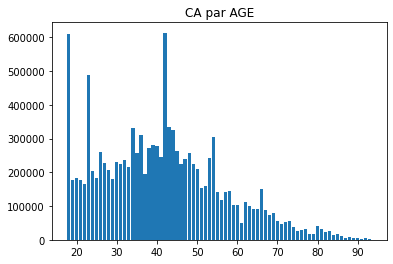

In [50]:
x= ca_age['age']
y= ca_age['price']
plt.bar(x,y)

plt.title('CA par AGE')

###### Conclusion 
###### Le CA augmente selon l'age entre 18 et 45ans ensuite on remarque une baisse du CA en fonction de l'age à partir de 45 ans

### Calculons le CA par catégorie

In [51]:
ca_categories = ventes.groupby('categ',as_index= False)['price'].sum()
ca_categories

,categ,price
0,0,4419730.97
1,1,4653722.69
2,2,2780275.02


Text(0.5, 1.0, 'CA par Categorie')

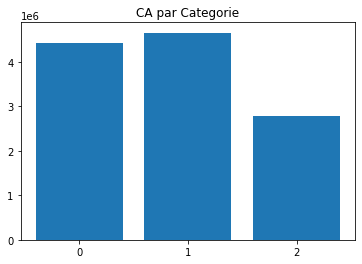

In [52]:
x= ca_categories['categ']
y= ca_categories['price']
plt.bar(x,y)

plt.title('CA par Categorie')

###### Conclusion
###### La catégorie 1 fait plus de ventes ensuite  vient la catégorie 0 et enfin la catégorie 2 

### CA selon le  genre

In [53]:
ca_sexe =  ventes.groupby('sex', as_index= False)['price'].sum()
ca_sexe

,sex,price
0,f,5859683.13
1,m,5994045.55


Text(0.5, 1.0, 'CA selon le sexe')

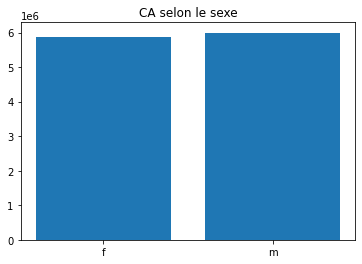

In [54]:
x= ca_sexe['sex']
y= ca_sexe['price']
plt.bar(x,y)

plt.title('CA selon le sexe')

###### Conclusion
###### il n'y a pas de différence notable du CA selon le genre 

### Calculons le CA par mois

In [55]:
ca_mois = ventes.drop(['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth', 'age'], axis=1)
ca_mois.head(5)

,Année-mois,price,categ
0,2022-05,4.18,0
1,2021-07,4.18,0
2,2022-08,4.18,0
3,2021-05,4.18,0
4,2022-05,4.18,0


In [56]:
ca_mois = ca_mois.groupby('Année-mois').sum()
ca_mois.head(5)

,price
Année-mois,
2021-03,482440.61
2021-04,476109.30
2021-05,492943.47
2021-06,484088.56
2021-07,482835.40


<AxesSubplot:xlabel='Année-mois'>

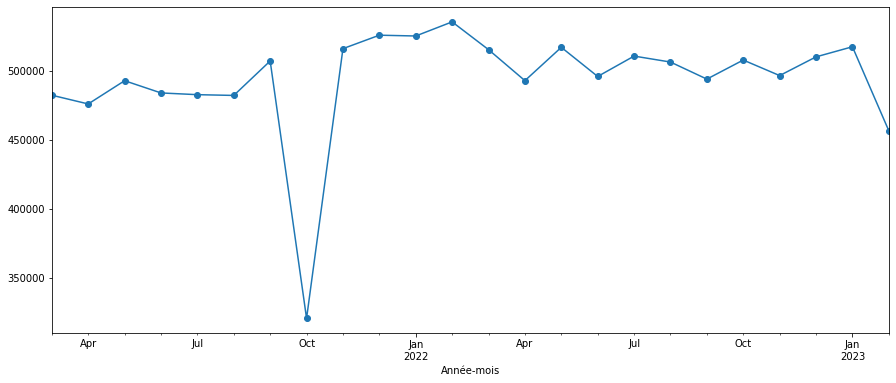

In [57]:
ca_mois['price'].plot(marker= 'o',figsize=(15,6))

###### Conclusion
###### Le CA mensuel est stable il varie entre 450000 et 500000 sauf pour le mois d'Octobre 2021 où on note une baisse enorme

### Décomposition en moyenne mobile pour évaluer la tendance globale

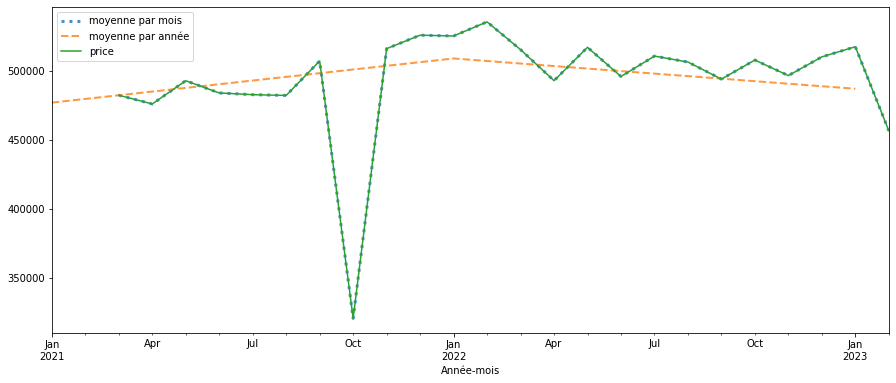

In [58]:

plt.figure(figsize=(15,6))

ca_mois['price'].resample('M').mean().plot(label= 'moyenne par mois', lw=3, ls= ':', alpha= 0.8)
ca_mois['price'].resample('Y').mean().plot(label = 'moyenne par année', lw=2, ls='--', alpha= 0.8)
ca_mois['price'].rolling(window=1, center= True).mean().plot()

plt.legend()
plt.show()


<AxesSubplot:xlabel='Année-mois'>

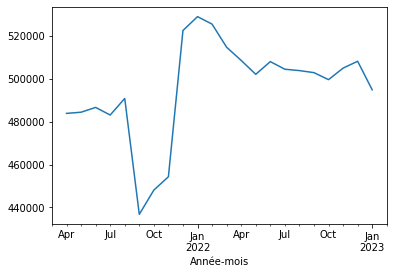

In [59]:
ca_mois['price'].rolling(window=3, center= True).mean().plot()

###### top et flop 
###### j'ai crée une matrice top_flop en regroupant les id_prod j'ai ensuite ordonné la variable price de facon décroisante ainsi en choisissant les  premiers j'ai les top products, si je prends les derniers j'aurai les flop products

In [60]:
top_flop= ventes.groupby('id_prod', as_index= False)['price'].sum().sort_values('price', ascending = False)

###### les top products
###### parmis les flop nous avons les produits de catégorie 2

In [61]:
top_products = top_flop.nlargest(10, 'price')
top_products

,id_prod,price
3096,2_159,94893.50
3070,2_135,69334.95
3045,2_112,65407.76
3034,2_102,60736.78
3152,2_209,56971.86
2619,1_395,54356.25
2591,1_369,54025.48
3043,2_110,53846.25
3201,2_39,53060.85
3104,2_166,52449.12


###### les flop products
###### parmis les flop nous avons les produits de catégorie 0

In [62]:
flop_product= top_flop.nsmallest(10, 'price')
flop_product

,id_prod,price
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1784,0_541,1.99
665,0_1601,1.99
2079,0_807,1.99
802,0_1728,2.27
549,0_1498,2.48
2179,0_898,2.54
925,0_1840,2.56


### CA par client

In [63]:
ca_client= ventes.groupby('client_id', as_index= False)['price'].sum()
ca_client['price']= ca_client['price'].astype(int)
ca_client

,client_id,price
0,c_1,558
1,c_10,1353
2,c_100,254
3,c_1000,2261
4,c_1001,1812
...,...,...
8595,c_995,189
8596,c_996,1625
8597,c_997,1490
8598,c_998,2779


###### Représentation graphique CA client

<AxesSubplot:>

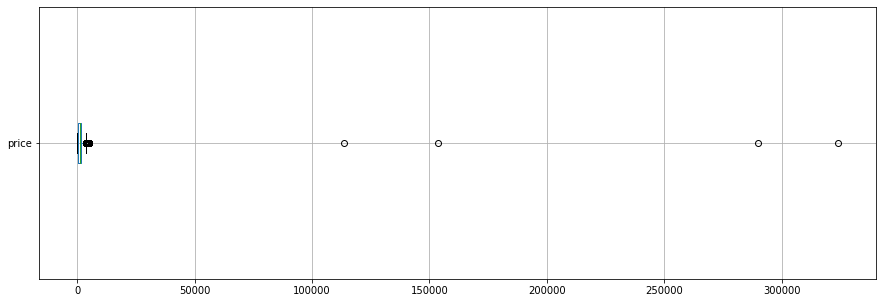

In [64]:
ca_client.boxplot(column="price", vert=False, figsize = (15,5))

###### Filtrons sur les outliers

In [65]:
ca_client_outliers = ca_client[ca_client['price']>100000]
ca_client_outliers

,client_id,price
677,c_1609,324033
2724,c_3454,113637
4388,c_4958,289760
6337,c_6714,153598


###### Supprimons les outliers dans ca_client

In [66]:
values = ['c_1609', 'c_3454', 'c_4958', 'c_6714']
ca_client= ca_client[~ca_client.client_id.isin(values)]
ca_client

,client_id,price
0,c_1,558
1,c_10,1353
2,c_100,254
3,c_1000,2261
4,c_1001,1812
...,...,...
8595,c_995,189
8596,c_996,1625
8597,c_997,1490
8598,c_998,2779


###### Supprimons les outliers dans ventes avant de faire les test statisques car ces clients ne sont pas représentatifs de la population et concentre un ca_client trop élevé.

In [67]:
values = ['c_1609', 'c_3454', 'c_4958', 'c_6714']
ventes = ventes[~ventes.client_id.isin(values)]
ventes

,id_prod,date,session_id,client_id,Année-mois,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05,f,1986,36,4.18,0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07,f,1986,36,4.18,0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022-08,f,1986,36,4.18,0
12,0_1518,2022-05-27 12:41:28.779302,s_214775,c_7456,2022-05,f,1985,37,4.18,0
13,0_1518,2021-11-27 12:41:28.779302,s_125853,c_7456,2021-11,f,1985,37,4.18,0
...,...,...,...,...,...,...,...,...,...,...
679106,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,2023-01,m,1945,77,35.24,1
679107,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,2022-11,m,1945,77,35.24,1
679108,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,2021-09,m,1945,77,35.24,1
679109,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,2022-02,m,1993,29,86.99,2


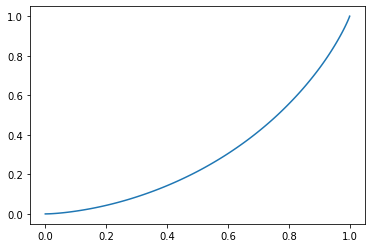

In [68]:
ca_par_client = ca_client['price'] 
ca_par_client = ca_client['price'].values
n = len(ca_par_client)
lorenz = np.cumsum(np.sort(ca_par_client)) / ca_par_client.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')

plt.show()


###### Indice de gini

In [69]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini


0.40277593011660007

###### Conclusion

###### l'indice de gini est de 0.40 ce qui signifie que la répartition du CA par client est inégale 

# 3 Analyse Bivarié

## 3-1 le lien entre le genre d’un client et les catégories des livres achetés 
## Test du Khi²
###### L'intérêt du test du Khi² est de mesurer l'indépendance entre deux variables qualitatives à partir du tableau de contigence.

In [70]:
Khi2_sex_categ= pd.crosstab(ventes['sex'], ventes['categ'], margins=True,margins_name="Total")
Khi2_sex_categ

categ,0,1,2,Total
sex,,,,
f,200793,111331,16980,329104
m,186488,101017,15868,303373
Total,387281,212348,32848,632477


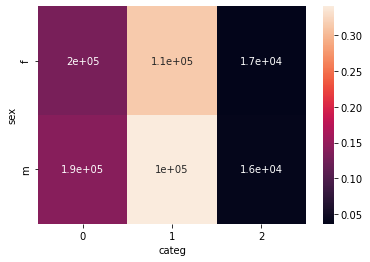

In [71]:
import seaborn as sns

tx = Khi2_sex_categ.loc[:,["Total"]]
ty = Khi2_sex_categ.loc[["Total"],:]
n = len(ventes)
indep = tx.dot(ty) / n

c = Khi2_sex_categ.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

###### On pose les hypothèses de départ :

###### H0 : Variables indépendantes si p-value > 5%
###### H1 : Variables non indépendantes si p-value < 5%

In [72]:
from scipy.stats import chi2_contingency
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(Khi2_sex_categ)

In [73]:
p_value

0.0025371819244419495

In [74]:
chi2_contingency(Khi2_sex_categ)

(20.213460693513895,
 0.0025371819244419495,
 6,
 array([[201518.35754344, 110493.46646914,  17092.17598743,
         329104.        ],
        [185762.64245656, 101854.53353086,  15755.82401257,
         303373.        ],
        [387281.        , 212348.        ,  32848.        ,
         632477.        ]]))

###### Conclusion

###### H1 est retenu car p-value < 5% ce qui signifie les variables genre et categoriee sont dépendantes. Il y'a un lien entre ces variables.

## 3-2  le lien entre l’âge des clients et le montant total des achats

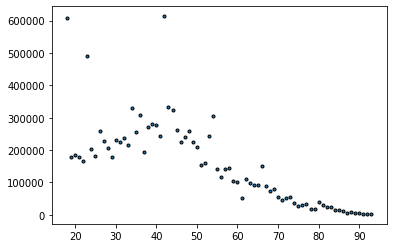

In [75]:
x = ca_age.age
y= ca_age.price

plt.scatter(x, y, edgecolor='k', marker='.')

###### L'intérêt des tests de corrélation est d'apporter plus de pertinence et fiabilité aux coefficients de corrélation. Il existe différents test de corrélation, nous utilisons celui de Pearson.

In [76]:
from scipy.stats import pearsonr

###### On pose les hypothèses de départ :

###### H0 : Variables indépendantes si p-value > 5%
###### H1 : Variables non indépendantes si p-value < 5%

###### La première sortie correspond au coefficient de corrélation, la seconde à la p-value (ou probabilité critique)

In [77]:
pearsonr(ca_age.age, ca_age.price)

(-0.7788810457116596, 1.1949535843461165e-16)

###### Conclusion

###### Le coefficient de corrélation et le p-value (inférieur à 5%) montre qu'il y'a un lien entre l'age du client et le montant du panier. Plus l'age augente le montant du panier diminue.


## 3-3  Le lien entre l’âge des clients et la frequence d'achats

In [78]:
frequence_achat= ventes.groupby(['Année-mois','age']).session_id.agg(['count'])
frequence_achat.reset_index(inplace= True)

In [79]:
frequence_achat

,Année-mois,age,count
0,2021-03,18,596
1,2021-03,19,207
2,2021-03,20,136
3,2021-03,21,172
4,2021-03,22,187
...,...,...,...
1819,2023-02,89,9
1820,2023-02,90,19
1821,2023-02,91,2
1822,2023-02,92,7


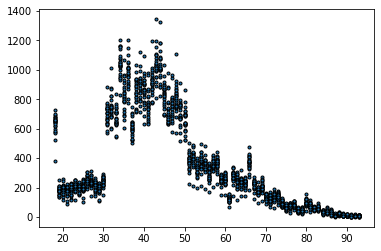

In [80]:
x = frequence_achat['age']
y= frequence_achat['count']

plt.scatter(x, y, edgecolor='k', marker='.')

###### On pose les hypothèses de départ :

###### H0 : Variables indépendantes si p-value > 5%
###### H1 : Variables non indépendantes si p-value < 5%

###### La première sortie correspond au coefficient de corrélation, la seconde à la p-value (ou probabilité critique)

In [81]:
pearsonr(frequence_achat['age'], frequence_achat['count'])

(-0.5666501466940881, 1.9829719925468427e-155)

###### Conclusion

###### Le coefficient de corrélation ne nous permet pas de dire qu'il y'a une corrélation mais le p-value (inférieur à 5%) montre qu'il y'a un lien entre l'age du client et le montant du panier. Plus l'age augente la fréquence d'achat diminue.

## 3-4 Le lien entre la taille du panier moyen et les catégories des livres achetés.

###### Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.
###### On voit ici que les montants sont  différents entre la  catégorie 2 et les autres,  les montants de la categorie 2 sont plus elevés et plus dispersés que ceux des  autres catégories 0 et 1

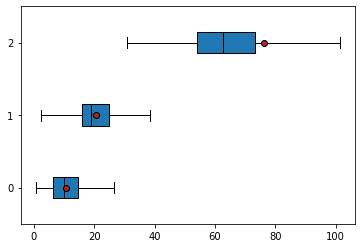

In [82]:
X = "categ" # qualitative
Y = "price" # quantitative

modalites = ventes[X].unique()
groupes = []
for m in modalites:
    groupes.append(ventes[ventes[X]==m][Y])

# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

###### Calculons eta_squared pour determiner s'il y'a une corrélation entre categorie et panier moyen

In [83]:
X = "categ" # qualitative
Y = "price" # quantitative

sous_echantillon = ventes["price"].copy()  

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    

In [84]:
 eta_squared(x,y)

0.9729185371522219

##### Interpretation du résultat

 ###### eta_squared est trés proche de 1 cela signifie que les moyennes par classes sont très différentes, chacune des classes étant constituée de valeurs identiques : il existe donc à priori une relation entre les variables categorie du livre acheté et la taille du panier moyen .